In [335]:
#Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [336]:
#Data
os.chdir('D:/Emre Masaüstü/Python/NLP/YouTube-Spam-Collection-v1/')
data = pd.read_csv('Youtube04-Eminem.csv')

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 5 columns):
COMMENT_ID    448 non-null object
AUTHOR        448 non-null object
DATE          203 non-null object
CONTENT       448 non-null object
CLASS         448 non-null int64
dtypes: int64(1), object(4)
memory usage: 17.6+ KB


In [338]:
# Data overlook
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [339]:
#selecting data that we will use
data=data[['COMMENT_ID','CLASS','CONTENT']]

#removing dublicates
data=data.drop_duplicates()

In [340]:
######################################################################
# Transform string data and remove punctuation -- STANDARDIZATION
######################################################################
data['verified_reviews'] = data.CONTENT.apply(lambda x: x.lower())#harfler küçüktüldü
data['verified_reviews'] = data.verified_reviews.apply(lambda x: ''.join([c for c in x if c not in punctuation]))#noktalama işaretleri kaldırıldı
data['verified_reviews'] = data.verified_reviews.apply(lambda x: re.sub(r"\d","", x))#yazı karakteri dışındakileri boşlukları siler
data['verified_reviews'] = data.verified_reviews.apply(lambda x: re.sub(r"\W"," ", x))#yazı karakteri dışındakileri siler
data['verified_reviews'] = data.verified_reviews.apply(lambda x: re.sub(r"^\s","", x))#baştaki boşlukları siler
data['verified_reviews'] = data.verified_reviews.apply(lambda x: re.sub(r"\s$","", x))#sondaki boşlukları siler

In [341]:
data.head()

,COMMENT_ID,CLASS,CONTENT,verified_reviews
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,1,+447935454150 lovely girl talk to me xxx﻿,lovely girl talk to me xxx
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,0,I always end up coming back to this song<br />﻿,i always end up coming back to this songbr
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,1,"my sister just received over 6,500 new <a rel=...",my sister just received over new a relnofollo...
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,0,Cool﻿,cool
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,1,Hello I&#39;am from Palastine﻿,hello iam from palastine


In [342]:
##############
#STEMMING
##############
from nltk.stem.snowball import SnowballStemmer
englishStemmer=SnowballStemmer("english")
#englishStemmer.stem("having") #result:"have"
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [englishStemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

data['verified_reviews'] = data['verified_reviews'].apply(stem_sentences)

In [343]:
##########################################
#Preprocessing -- TOKENIZE-STOPWORDS VS.
##########################################
from nltk.tokenize import word_tokenize 
word_tokenize(data.verified_reviews[0])
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 
data['cleaned_reviews'] = data.verified_reviews.apply(lambda x: word_tokenize(x))
data['cleaned_reviews'] = data.cleaned_reviews.apply(lambda x: [w for w in x if w not in stop_words])
data['cleaned_reviews'] = data.cleaned_reviews.apply(lambda x: ' '.join(x))

In [344]:
###################
###EDA
###################
# Get length of review for EDA
data['review_length'] = data.verified_reviews.apply(lambda x: len(x))

# Check the data again
data.head()

,COMMENT_ID,CLASS,CONTENT,verified_reviews,cleaned_reviews,review_length
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,1,+447935454150 lovely girl talk to me xxx﻿,love girl talk to me xxx,love girl talk xxx,24
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,0,I always end up coming back to this song<br />﻿,i alway end up come back to this songbr,alway end come back songbr,39
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,1,"my sister just received over 6,500 new <a rel=...",my sister just receiv over new a relnofollow c...,sister receiv new relnofollow classothashtag h...,160
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,0,Cool﻿,cool,cool,4
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,1,Hello I&#39;am from Palastine﻿,hello iam from palastin,hello iam palastin,23


In [345]:
# Take a look at the mean, standard deviation, and maximum
print('The mean for the length of review:',data['review_length'].mean())
print('The standard deviation for the length of reviews:',data['review_length'].std())
print('The maximum for the length of reviews:',data['review_length'].max())

The mean for the length of review: 96.38116591928251
The standard deviation for the length of reviews: 124.09557029091965
The maximum for the length of reviews: 759


Text(0.5,1,'Yorum Uzunluklarının Dağılımı')

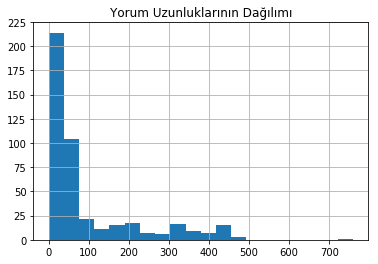

In [346]:
#take a look at the distribution of the length
data['review_length'].hist(bins=20)
plt.title('Yorum Uzunluklarının Dağılımı')

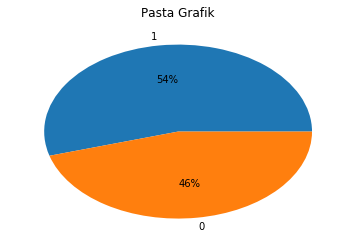

In [347]:
#TARGET CHARTS
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pasta Grafik')
plt.ylabel('')
plt.show()

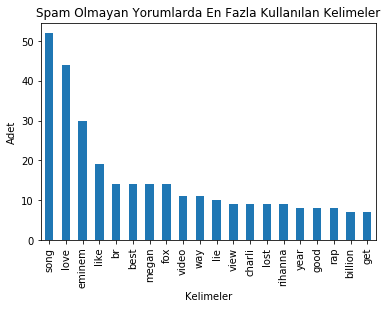

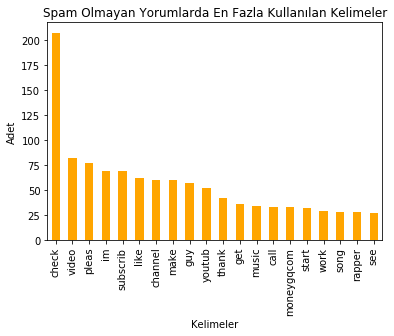

In [348]:
#TARGET'A GÖRE BAR GRAFİK
count1 = Counter(" ".join(data[data['CLASS']==0]["cleaned_reviews"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['CLASS']==1]["cleaned_reviews"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('Spam Olmayan Yorumlarda En Fazla Kullanılan Kelimeler')
plt.xlabel('Kelimeler')
plt.ylabel('Adet')
plt.show()

df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('Spam Olmayan Yorumlarda En Fazla Kullanılan Kelimeler')
plt.xlabel('Kelimeler')
plt.ylabel('Adet')
plt.show()

In [349]:
# counting non spam words
total = df1[['words in non-spam','count']].sort_values(ascending = False, by=['count'] )
percent = (df1['count']/df1['count'].sum()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total          Percent
   words in non-spam count      count
0               song    52  16.938111
1               love    44  14.332248
2             eminem    30   9.771987
3               like    19   6.188925
4                 br    14   4.560261
5               best    14   4.560261
6              megan    14   4.560261
7                fox    14   4.560261
8              video    11   3.583062
9                way    11   3.583062
10               lie    10   3.257329
11              view     9   2.931596
12            charli     9   2.931596
13              lost     9   2.931596
14           rihanna     9   2.931596
15              year     8   2.605863
16              good     8   2.605863
17               rap     8   2.605863
18           billion     7   2.280130
19               get     7   2.280130

In [350]:
# counting spam words
total = df2[['words in spam','count_']].sort_values(ascending = False, by=['count_'] )
percent = (df2['count_']/df2['count_'].sum()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total           Percent
   words in spam count_     count_
0          check    207  18.531782
1          video     82   7.341092
2          pleas     77   6.893465
3             im     69   6.177261
4       subscrib     69   6.177261
5           like     62   5.550582
6        channel     60   5.371531
7           make     60   5.371531
8            guy     57   5.102954
9         youtub     52   4.655327
10         thank     42   3.760072
11           get     36   3.222919
12         music     34   3.043868
13          call     33   2.954342
14    moneygqcom     33   2.954342
15         start     32   2.864816
16          work     29   2.596240
17          song     28   2.506714
18        rapper     28   2.506714
19           see     27   2.417189

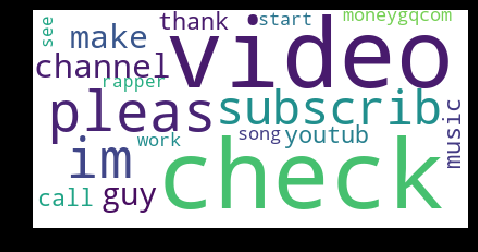

In [351]:
#word cloud for spam
from wordcloud import WordCloud, STOPWORDS
def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in df2[col]]))
    plt.figure( figsize=(8,4), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
wordcloud(df2,'words in spam')

In [352]:
##################
#TEST-TRAIN SPLIT
##################

y=data['CLASS']

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train, X_test, y_train, y_test = train_test_split(data["cleaned_reviews"], y, test_size=0.33
                                    ,random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

y_train = np.asarray(y_train.values)

ch2 = SelectKBest(chi2, k = 300)

X_new = ch2.fit_transform(count_train, y_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

X_test_new = ch2.transform(X=count_test)

In [353]:
############################
#AĞRILIKLANDIRMA
############################
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)


############
#BOW
###########
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

############
#TF-IDF
###########
# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_train = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_test = pd.DataFrame(tfidf_test.A, columns=tfidf_vectorizer.get_feature_names())

In [354]:
tfidf_train.head()

,ablaz,absolut,abus,abusu,acaer,accept,accomplish,achiev,actual,ad,...,youtubebr,youtubebut,youtubechcfcvzfzfbvzdr,youtubecomuserloseweight,youtubecomwatchvasfnshghkampfeatureyoutub,yr,yrs,ytma,yuliya,zonepacom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [355]:
#feature selection based on most populer words in target 1 and 0
tfidf_train=tfidf_train[['check','pleas','subscrib','im','video','make','like','channel','guy','song','love','eminem']]
tfidf_test=tfidf_test[['check','pleas','subscrib','im','video','make','like','channel','guy','song','love','eminem']]

In [356]:
tfidf_train.head()

,check,pleas,subscrib,im,video,make,like,channel,guy,song,love,eminem
0,0.092865,0.0,0.131747,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0.000000,0.0,0.000000,0.0,0.677855,0.0,0.0,0.000000,0.0,0.0,0.735195,0.000000
3,0.000000,0.0,0.299182,0.0,0.000000,0.0,0.0,0.339532,0.0,0.0,0.000000,0.000000
4,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.595168


In [357]:
############
#MODELLING
###########
###############################
#LOGISTIC REGRESSION
#FITTING LOGISTIC REGRESSION TO THE TRAINING SET
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(fit_intercept = True, random_state = 0)
logistic_reg.fit(tfidf_train, y_train)

#PREDICTING THE TEST SET RESULTS
y_pred = logistic_reg.predict(tfidf_test)

In [358]:
#MAKING THE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm_logistic_reg = confusion_matrix(y_test, y_pred)
cm_logistic_reg

array([[63,  5],
       [ 6, 74]], dtype=int64)

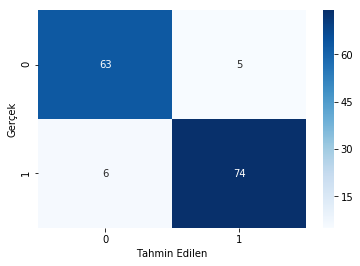

0.89932885906
0.925675675676


In [359]:
#CONFISUON MATRIX
def cm_logistic_reg(y_pred):
    cm_logistic_reg = confusion_matrix(y_test, y_pred)
    fig = plt.plot(figsize=(8,5))
    sns.heatmap(cm_logistic_reg,annot=True,cmap='Blues',fmt='g')
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    return plt.show()
cm_logistic_reg(y_pred)

print(logistic_reg.score(tfidf_train,y_train))
print(logistic_reg.score(tfidf_test,y_test))

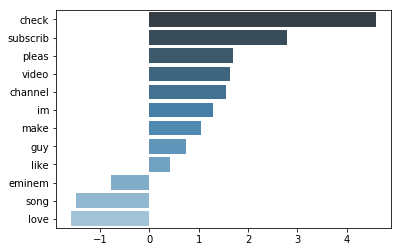

In [360]:
#To get the weights of all the variables
weights = pd.Series(logistic_reg.coef_[0],
                 index=tfidf_train.columns.values)
weights_sorted=weights.sort_values(ascending = False)

fig = plt.plot(figsize=(800,10))
sns.barplot(y=weights_sorted.index, x=weights_sorted.values, palette="Blues_d", orient='h')

In [361]:
#DEĞİŞKEN KATSAYILARI
coeff=logistic_reg.coef_
coeff_columns=tfidf_train.columns

In [362]:
coeff_data=pd.DataFrame(coeff, columns=coeff_columns)
coeff_data

,check,pleas,subscrib,im,video,make,like,channel,guy,song,love,eminem
0,4.585068,1.706999,2.796752,1.297366,1.641119,1.046679,0.428054,1.560279,0.737502,-1.483514,-1.576771,-0.778794


In [363]:
#TRUE POSITIVE - FALSE POSITIVE
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))

Doğruluk=(TP+TN)/(TP+TN+FP+FN) 
Duyarlılık=TP/(TP+FN)
Hassasiyet=TP/(TP+FP)
print ('Doğruluk: %f, Duyarlılık: %f, Hassasiyet: %f' % (Doğruluk,Duyarlılık,Hassasiyet))

Doğruluk: 0.925676, Duyarlılık: 0.925000, Hassasiyet: 0.936709


In [364]:
from sklearn.metrics import cohen_kappa_score
Kappa_Katsayısı=cohen_kappa_score(y_test, y_pred)
print ('Kappa_Katsayısı: %f' % (Kappa_Katsayısı))

Kappa_Katsayısı: 0.850533


In [365]:
from sklearn.metrics import f1_score
F_Skoru=f1_score(y_test, y_pred, average='binary') 
print ('F_Skoru: %f' % (F_Skoru))

F_Skoru: 0.930818


In [366]:
#NAIVE BAYES
#FITTING NAIVE BAYES TO THE TRAINING SET
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(tfidf_train, y_train)

#PREDICTING THE TEST SET RESULTS
y_pred = naive_bayes.predict(tfidf_test)

In [367]:
#MAKING THE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm_naive_bayes = confusion_matrix(y_test, y_pred)
cm_naive_bayes

array([[27, 41],
       [ 2, 78]], dtype=int64)

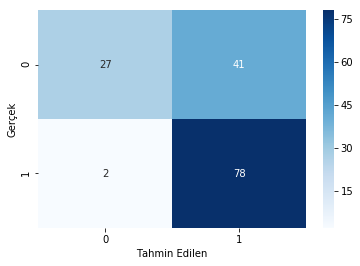

0.728187919463
0.709459459459


In [368]:
#CONFISUON MATRIX
def cm_naive_bayes(y_pred):
    cm_naive_bayes = confusion_matrix(y_test, y_pred)
    fig = plt.plot(figsize=(8,5))
    sns.heatmap(cm_naive_bayes,annot=True,cmap='Blues',fmt='g')
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    return plt.show()
cm_naive_bayes(y_pred)

print(naive_bayes.score(tfidf_train,y_train))
print(naive_bayes.score(tfidf_test,y_test))

In [369]:
naive_bayes.coef_

array([[-1.58419157, -2.55795905, -2.26335982, -2.64386366, -1.85895307,
        -3.00732508, -2.59350799, -2.54697692, -2.94935942, -3.21827481,
        -3.19877619, -2.97999666]])

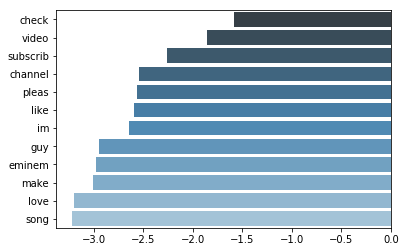

In [370]:
#To get the weights of all the variables
weights = pd.Series(naive_bayes.coef_[0],
                 index=tfidf_train.columns.values)
weights_sorted=weights.sort_values(ascending = False)

fig = plt.plot(figsize=(800,10))
sns.barplot(y=weights_sorted.index, x=weights_sorted.values, palette="Blues_d", orient='h')

In [371]:
#TRUE POSITIVE - FALSE POSITIVE
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))

Doğruluk=(TP+TN)/(TP+TN+FP+FN) 
Duyarlılık=TP/(TP+FN)
Hassasiyet=TP/(TP+FP)
print ('Doğruluk: %f, Duyarlılık: %f, Hassasiyet: %f' % (Doğruluk,Duyarlılık,Hassasiyet))

Doğruluk: 0.709459, Duyarlılık: 0.975000, Hassasiyet: 0.655462


In [372]:
from sklearn.metrics import cohen_kappa_score
Kappa_Katsayısı=cohen_kappa_score(y_test, y_pred)
print ('Kappa_Katsayısı: %f' % (Kappa_Katsayısı))

Kappa_Katsayısı: 0.388782


In [373]:
from sklearn.metrics import f1_score
F_Skoru=f1_score(y_test, y_pred, average='binary') 
print ('F_Skoru: %f' % (F_Skoru))

F_Skoru: 0.783920
